# HUẤN LUYỆN MODEL KNN

In [ ]:
# 1 Nạp dữ liệu từ file Excel

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("data/heart_short.xlsx", sheet_name="data")
df

,age,t_index,f_status,c_index,target
0,45,3.1,1,1.2,1
1,50,2.8,0,1.4,0
2,39,3.5,1,1.1,1
3,60,2.2,0,1.5,0
4,55,3.0,1,1.3,1
5,42,3.3,1,1.2,1
6,61,2.5,0,1.6,0
7,47,3.6,1,1.1,1
8,53,2.9,0,1.3,0
9,48,3.1,1,1.4,1


In [7]:
# 2. Xử lý dữ liệu đầu vào và đầu ra
X = df[["age", "t_index", "f_status", "c_index"]].values  # input
y = df[["target"]].values  # output

X = X.astype(float)
y = y.astype(float)

print(X, y)

[[45.   3.1  1.   1.2]
 [50.   2.8  0.   1.4]
 [39.   3.5  1.   1.1]
 [60.   2.2  0.   1.5]
 [55.   3.   1.   1.3]
 [42.   3.3  1.   1.2]
 [61.   2.5  0.   1.6]
 [47.   3.6  1.   1.1]
 [53.   2.9  0.   1.3]
 [48.   3.1  1.   1.4]] [[1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]]


In [8]:
# 3. Chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=16
)   

# random state giúp python cắt dữ liệu ngẫu nhiên theo 1 quy tắc theo state
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(7, 4) (3, 4) (7, 1) (3, 1)


In [9]:
# 4. Khởi tạo và huấn luyện mô hình KNN
from sklearn.neighbors import KNeighborsClassifier

knnModel = KNeighborsClassifier(n_neighbors=5)

knnModel.fit(X_train, y_train)

c:\Users\trung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

# Đánh giá mô hình

- là quá trình so sánh giữa giá trị thực tế và giá trị dự báo
- giá trị dự báo là giá trị sinh ra từ mô hình (predict)
- giá trị thực tế là giá trị tự nhiên được thu thập (actual)  

In [10]:
# 5. Dự đoán trên tập kiểm tra
y_test_predicted = knnModel.predict(X_test)
y_test_predicted

knnModel.score(X_test, y_test)

1.0

In [11]:
# 6. Đánh giá độ chính xác của mô hình
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_predicted)

1.0

## CONFUSION MATRIX

|Dự đoán Không bệnh | Dự đoán Có bệnh|
|-|-|
|Thực tế Không bệnh - TP (True Positive) | FP (False Positive)|
|Thực tế Có bệnh - FN (False Negative) | TN (True Negative)|

## PYTHON CONFUSION MATRIX

|Ký hiệu|	Ý nghĩa|	Vị trí trong ma trận|
|-------|----------|------------------------|
|TP (True Positive)|	Dự đoán Có bệnh đúng|	cf_matrix[1][1] = 2|
|FN (False Negative)|	Dự đoán Không bệnh, nhưng thực tế Có bệnh|	cf_matrix[1][0] = 0|
|FP (False Positive)|	Dự đoán Có bệnh, nhưng thực tế Không bệnh|	cf_matrix[0][1] = 0|
|TN (True Negative)|	Dự đoán Không bệnh đúng|	cf_matrix[0][0] = 1|

In [12]:
# 7. Tạo ma trận nhầm lẫn (Confusion Matrix)
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_test_predicted)
cf_matrix

array([[1, 0],
       [0, 2]])

- **Precision**: Tỉ lệ dự đoán đúng trong số dự đoán dương tính.
- **Recall**: Tỉ lệ phát hiện đúng các trường hợp có bệnh.
- **F1-score**: Trung bình điều hòa của Precision và Recall.

In [13]:
# 8. Tính các chỉ số Precision, Recall, F1-score
def myscores(smat):
    tp = smat[0][0]
    fp = smat[0][1]
    fn = smat[1][0]
    tn = smat[1][1]
    vprecision = tp / (tp + fp)
    vrecall = tp / (tp + fn)
    vf1 = 2 * (vprecision * vrecall) / (vprecision + vrecall)
    return vprecision, vrecall, vf1


print("precision, recall, f1:", myscores(cf_matrix))

precision, recall, f1: (np.float64(1.0), np.float64(1.0), np.float64(1.0))


In [14]:
# 9. Báo cáo phân loại (Classification Report)
from sklearn.metrics import classification_report

target_names = ["Không bệnh", "Có bệnh"]
print(classification_report(y_test, y_test_predicted, target_names=target_names))

              precision    recall  f1-score   support

  Không bệnh       1.00      1.00      1.00         1
     Có bệnh       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



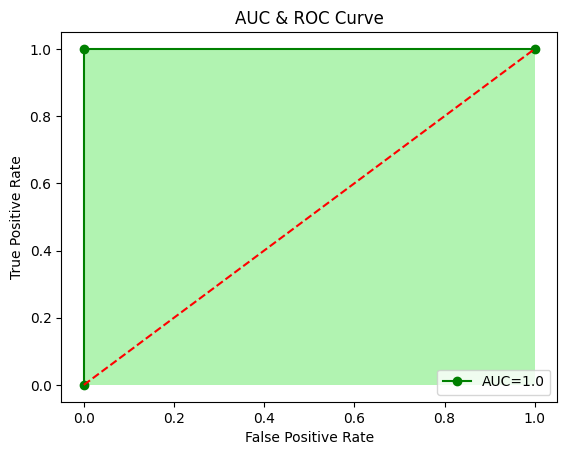

In [15]:
# 10. Vẽ biểu đồ ROC & AUC để đánh giá mô hình
from sklearn import metrics

y_pred_proba = knnModel.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, "go-", label="AUC=" + str(auc))
plt.plot([0, 1], [0, 1], "r--")
plt.title("AUC & ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.fill_between(fpr, tpr, facecolor="lightgreen", alpha=0.7)
plt.show()

In [ ]:
# 11. Lưu mô hình KNN vào file
import pickle

pickle.dump(knnModel, open("model_KNN_Heart.sav", "wb"))

In [18]:
# 12. Load lại mô hình đã lưu và dự đoán bệnh tim từ dữ liệu nhập vào
import pickle

# Load model từ file
loaded_model = pickle.load(open("model_KNN_Heart.sav", "rb"))

v1 = float(input("age: "))
v2 = float(input("t_index: "))
v3 = float(input("f_status: "))
v4 = float(input("c_index: "))

y_pred = loaded_model.predict([[v1, v2, v3, v4]])
print("Kết quả dự báo bệnh tim: " + str(y_pred[0]))

if y_pred[0] == 1:
    print("Bị bệnh tim")
else:
    print("Không bị bệnh")

Kết quả dự báo bệnh tim: 1.0
Bị bệnh tim
